# HR ANALYTICS- SALARY PREDICTION


## Loading Dataset into Python environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sal_data=pd.read_csv(r'C:\Users\USER\Downloads\salarydata.csv')

In [3]:
#Displayed the top 5 rows of the data
sal_data.head()

,age,workclass,education,education-num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours_per_week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#Shape of the data
sal_data.shape

(32561, 14)

In [5]:
# Statistical SUmmary of data
sal_data.describe().T


,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# Information about the data
sal_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
 #Found the number of unique values of each column
sal_data.nunique()

age                73
workclass           9
education          16
education-num      16
marital_status      7
occupation         15
relationship        6
race                5
sex                 2
capital-gain      119
capital-loss       92
hours_per_week     94
native-country     42
salary              2
dtype: int64

In [8]:
# Displayed the unique values in each column
for i in sal_data.columns:
    print(i)
    print(sal_data[i].unique())
    print("-"*50)
    print("\n")


age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
--------------------------------------------------


workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
--------------------------------------------------


education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
--------------------------------------------------


education-num
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
--------------------------------------------------


marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
--------------------------------------------------


oc

In [9]:
# value_counts of each column
def count_checker(sal_data):
    """count of each value under each feature in the data"""
    for col in sal_data.columns:
        print("Count for each category of values in {} feature.".format(col))
        print(sal_data[col].value_counts(),"\n")
        print("*"*40)

## Data cleaning

In [10]:
# Finding which all columns have '?' in their values
sal_data.isin(['?']).sum(axis=0)


age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [11]:
#Handling missing values
# the code will replace the special character to nan  
sal_data['native-country'] = sal_data['native-country'].replace('?',np.nan)
sal_data['workclass'] = sal_data['workclass'].replace('?',np.nan)
sal_data['occupation'] = sal_data['occupation'].replace('?',np.nan)


In [12]:
# Checking for null values
sal_data.isna().sum()


age                  0
workclass         1836
education            0
education-num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours_per_week       0
native-country     583
salary               0
dtype: int64

In [13]:
#filling the null values using Mode
for i in ['workclass','occupation','native-country']:
    sal_data[i]=sal_data[i].fillna(sal_data[i].mode()[0])

In [14]:
# Again checking null values
sal_data.isna().sum()


age               0
workclass         0
education         0
education-num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours_per_week    0
native-country    0
salary            0
dtype: int64

### Correlaton Matrix



<AxesSubplot:>

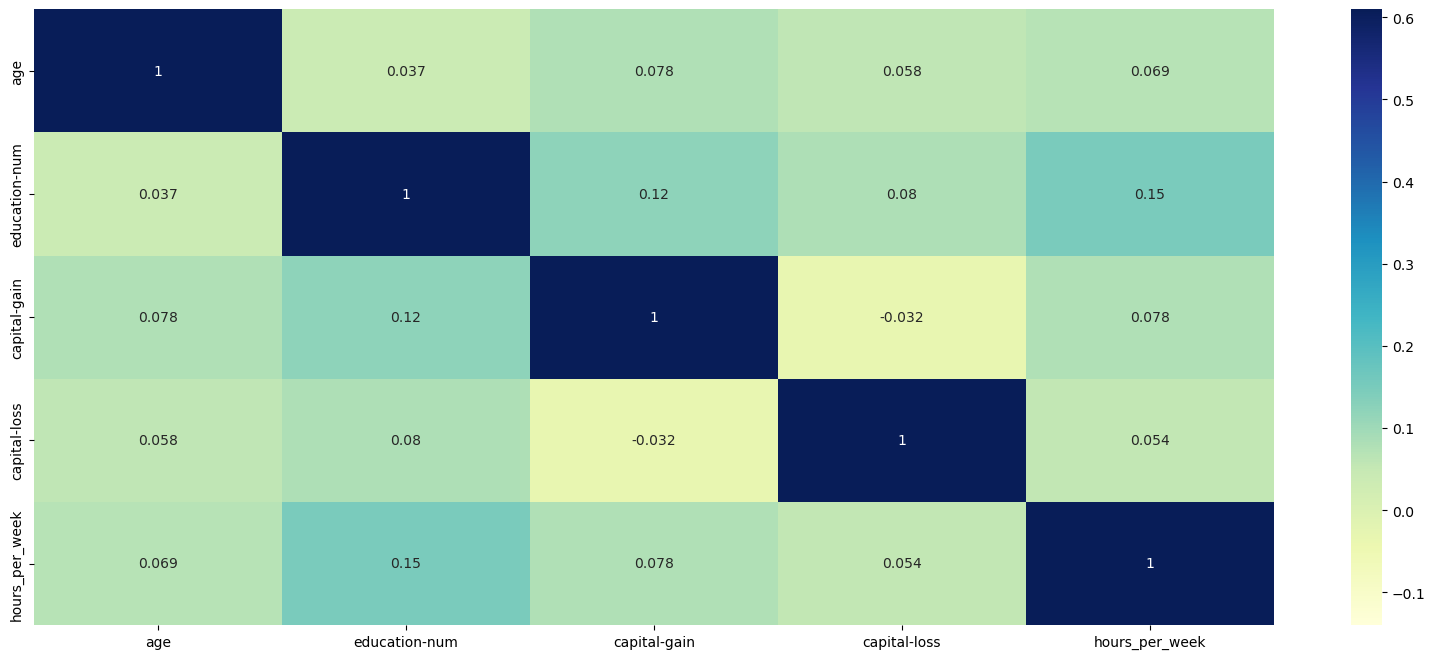

In [15]:
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

### Feature Reducton

In [16]:
 #Dropping irrelevant columns
sal_data=sal_data.drop(['education-num','capital-gain','capital-loss','native-country'],axis=1)
sal_data.head()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [17]:
# Assigning the numerical columns to num_cols
num_cols =  sal_data.select_dtypes(["number"])


In [18]:
num_cols.head()


,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40


## Outlier Handling

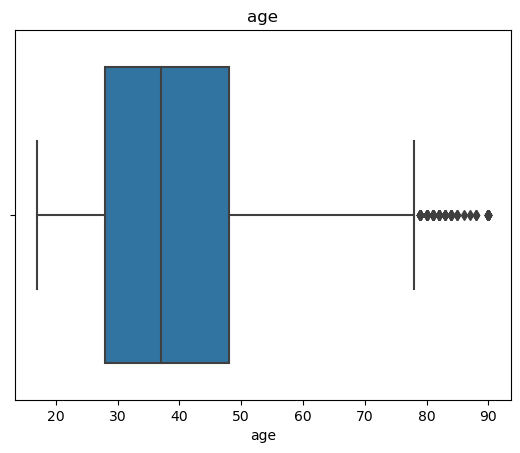

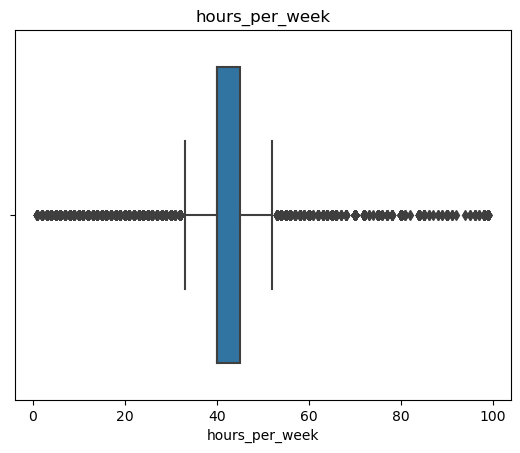

In [19]:
## checking outliers
for i in num_cols :
    plt.title(i)
    sns.boxplot(sal_data[i])
    plt.show()  


In [20]:
#Outlier Handling for the attribute Age
Q1=sal_data['age'].quantile(0.25) # 25th quantile
Q3=sal_data['age'].quantile(0.75)  # 75th quantile
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5*IQR 
Upper_Whisker = Q3 + 1.5*IQR
sal_data['age'] = np.clip(sal_data['age'], Lower_Whisker, Upper_Whisker) 
    # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker 
    # and all the values above upper_whishker will be assigned value of upper_Whisker 

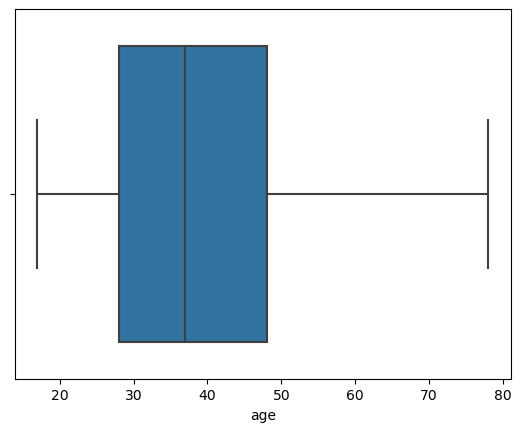

In [21]:
sns.boxplot(sal_data['age'])
plt.show()


In [22]:
sal_data['marital_status'].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [23]:
sal_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

## Data Visualization
UNIVARITE ANALYSIS



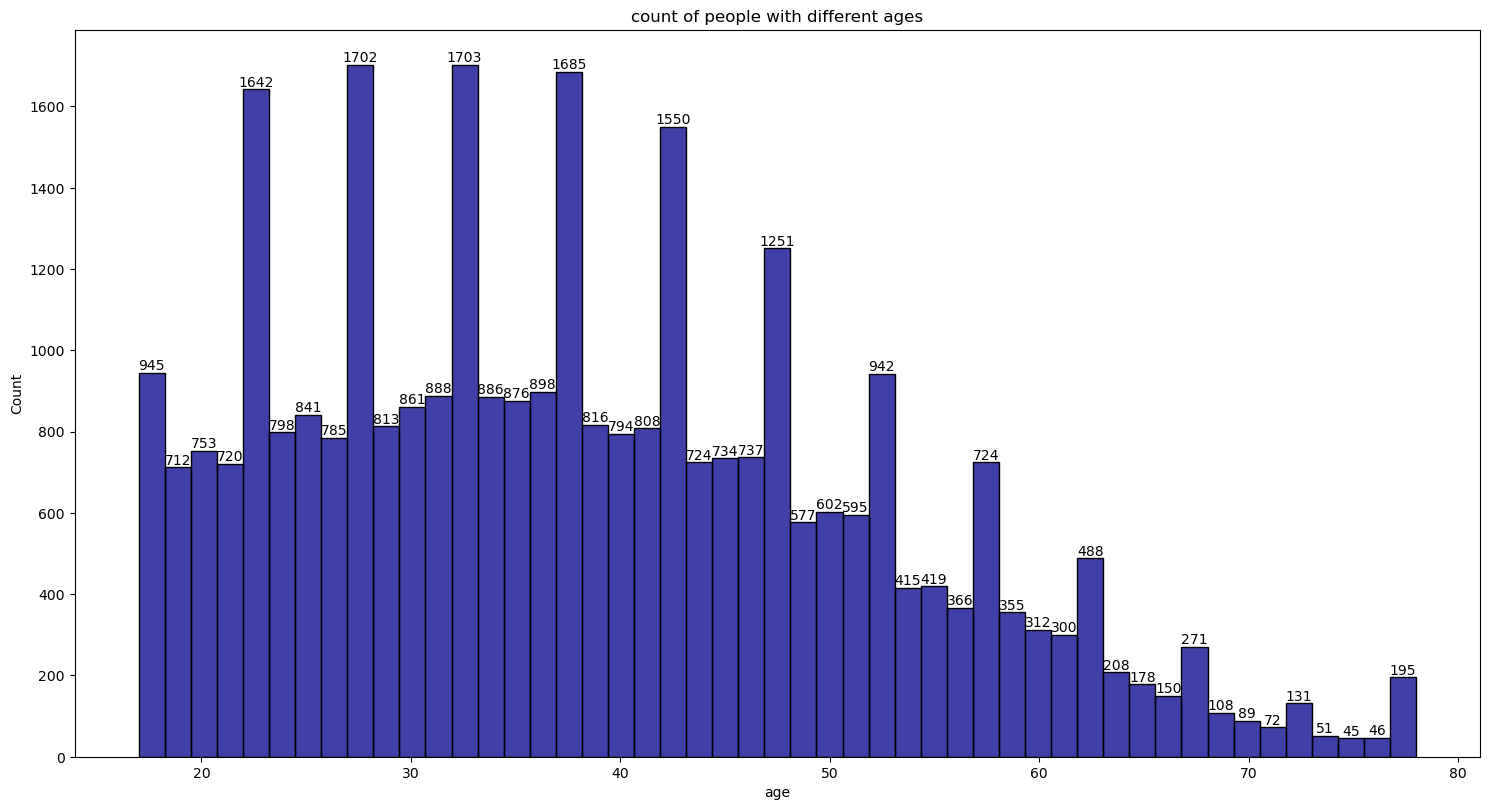

In [24]:
plt.figure(figsize=(15,8))
ax=sns.histplot(sal_data['age'],color='darkblue')
for p in ax.patches: 
    ax.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), ha='center', va='center', xytext=(0,5),textcoords='offset points')
plt.tight_layout()
plt.title('count of people with different ages')
plt.show()


In [25]:
#we are defining a function for count plot
def labeled_countplot(a):
  plt.figure(figsize=(15,8))
  ax=sns.countplot(x=sal_data[a])
  total = len(sal_data)
  for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.2f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()/2
    ax.annotate(percentage, (x,y), ha='center', va='center')
  plt.tight_layout()
  plt.show()
  return


In [26]:
sal_data.columns


Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'salary'],
      dtype='object')

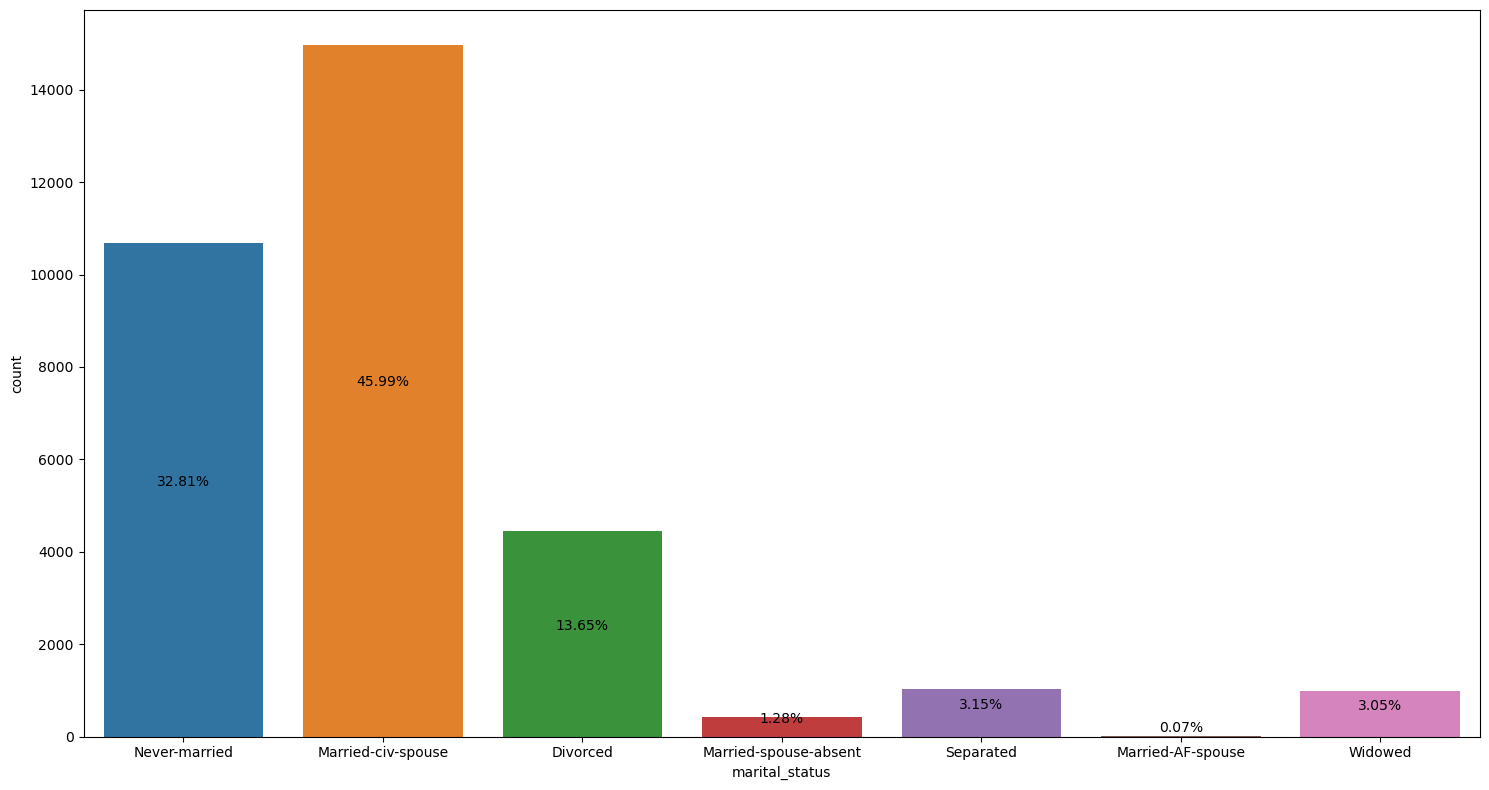

In [27]:
#plt.title('Marital Status')
labeled_countplot('marital_status')


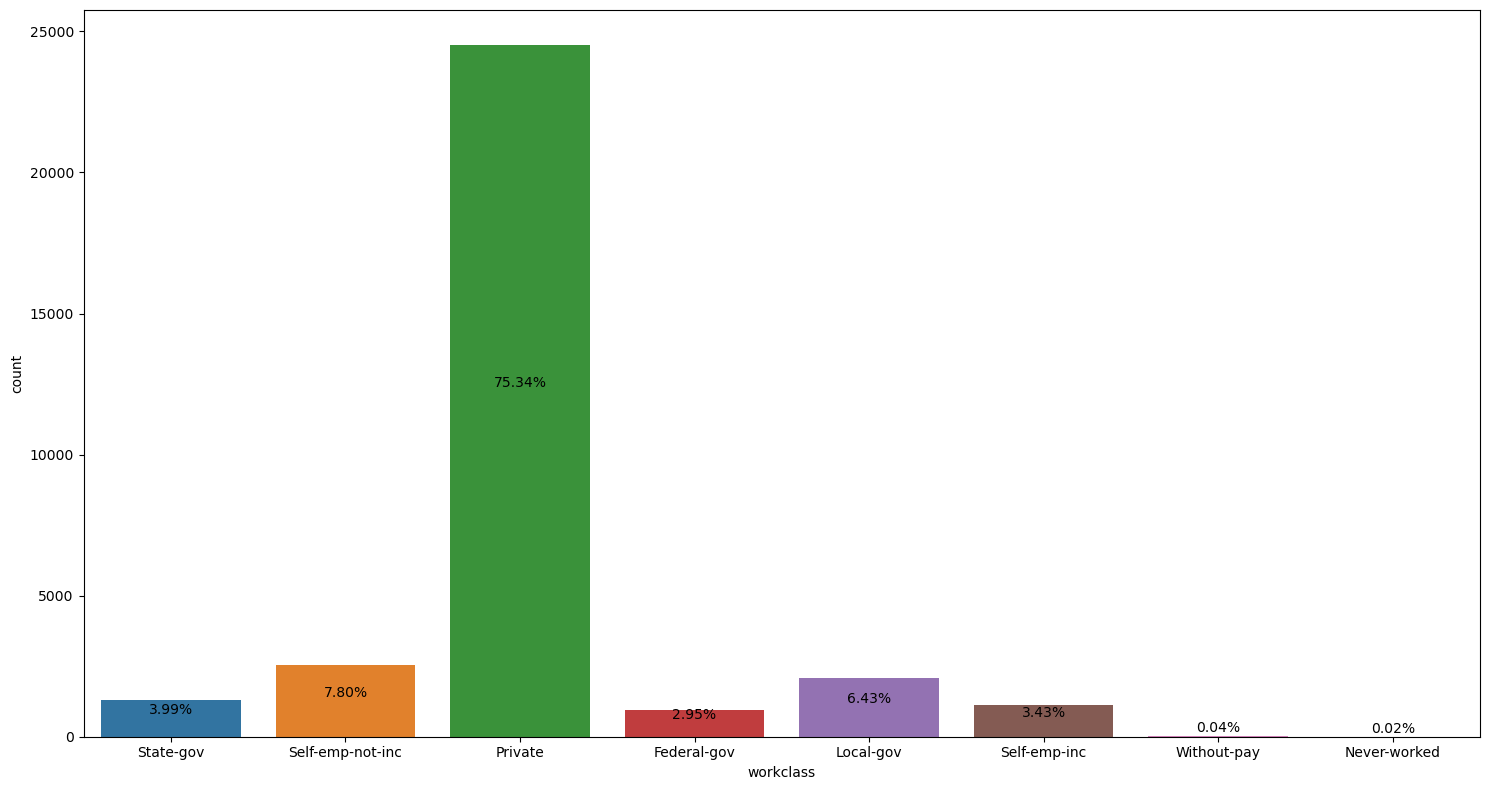

In [28]:
labeled_countplot('workclass')


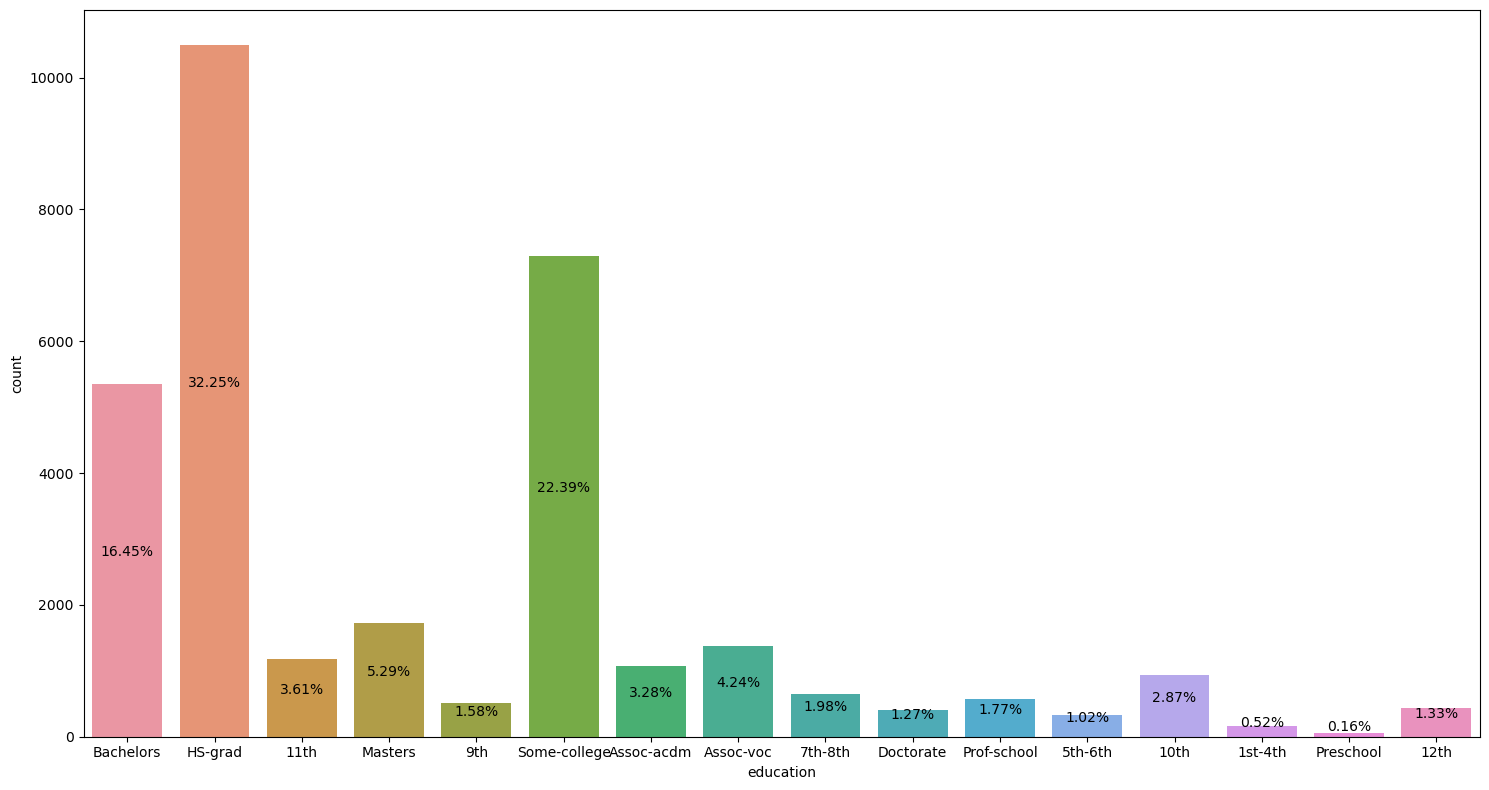

In [29]:
labeled_countplot('education')


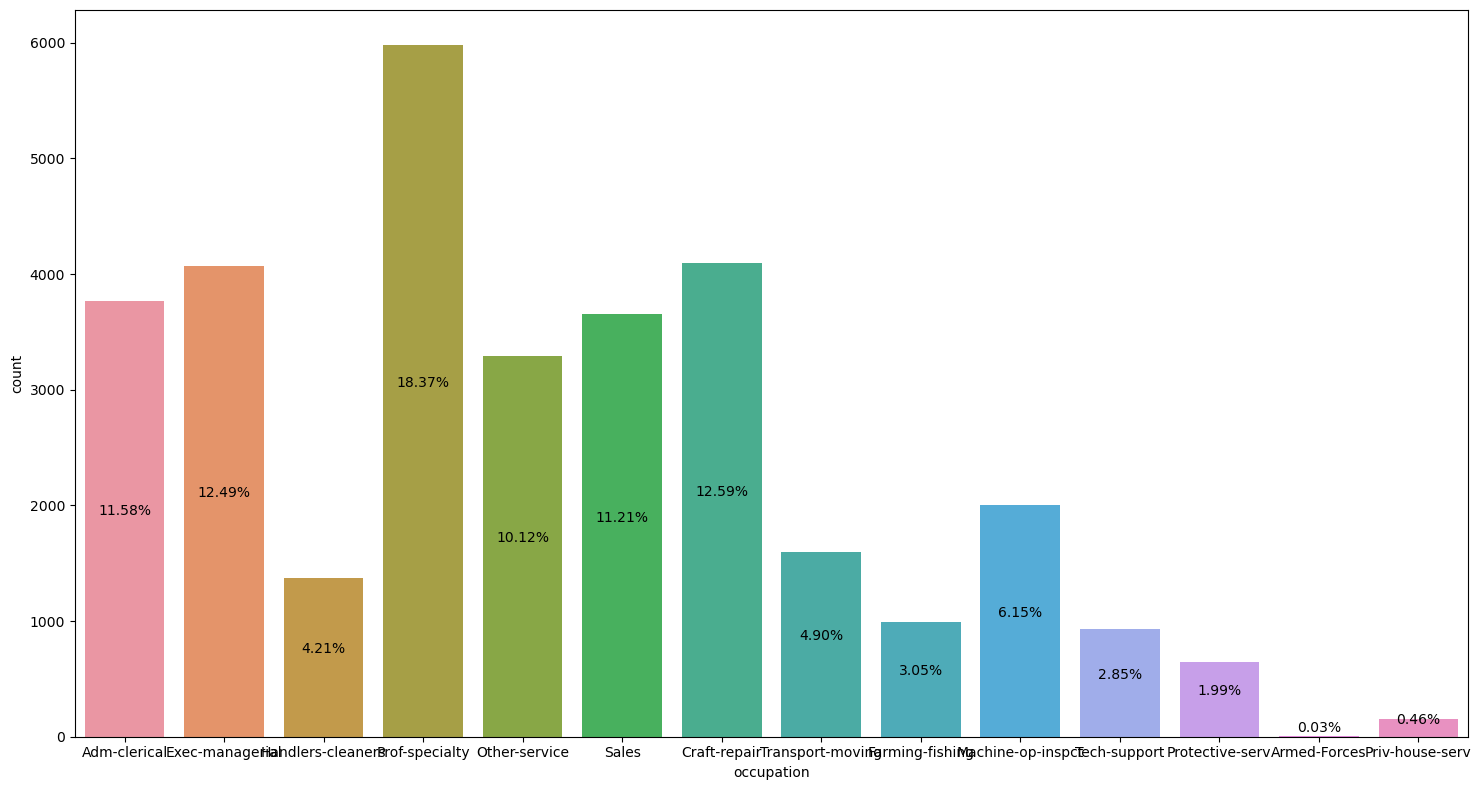

In [30]:
labeled_countplot('occupation')


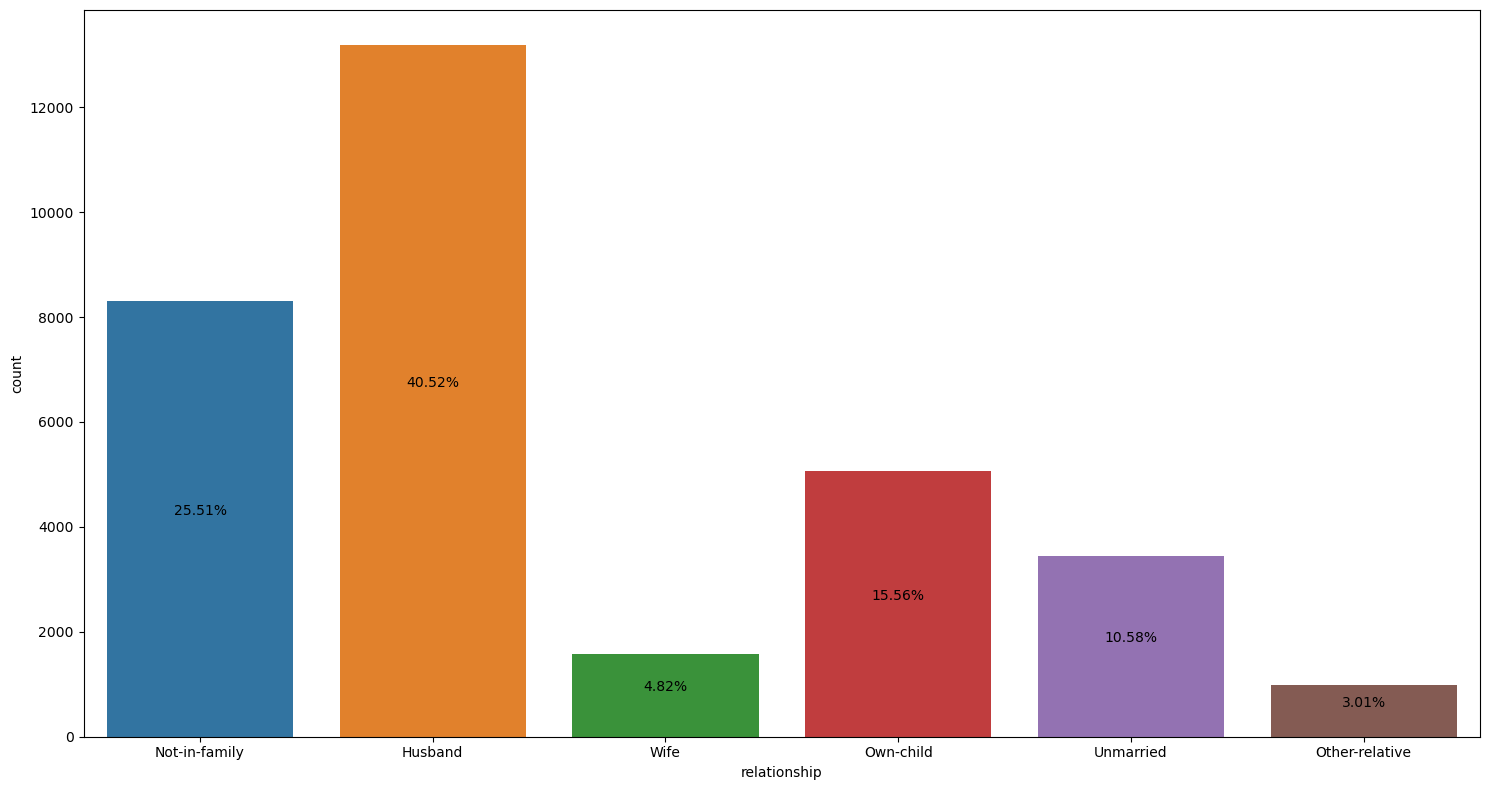

In [31]:
labeled_countplot('relationship')

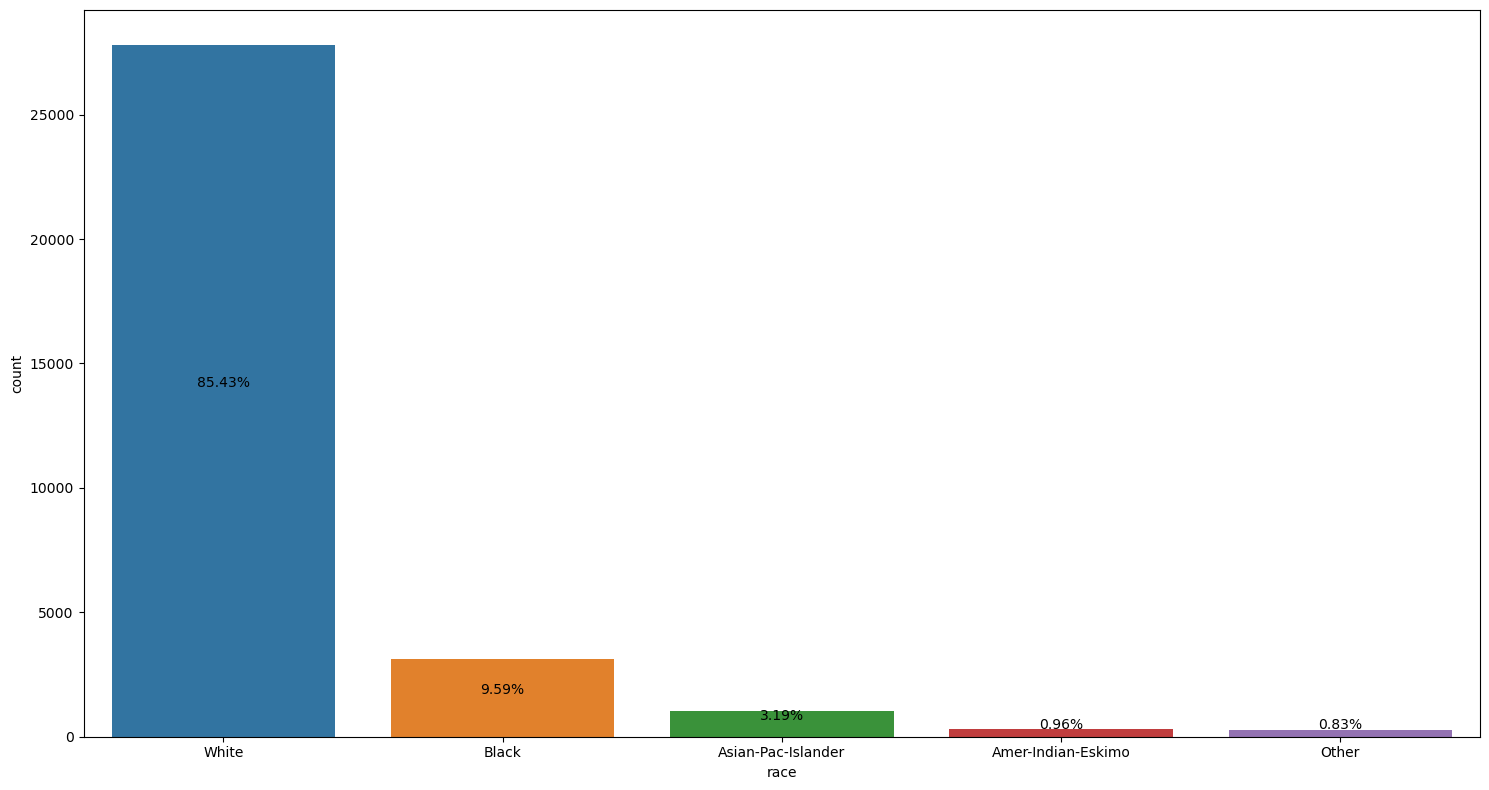

In [32]:
labeled_countplot('race')


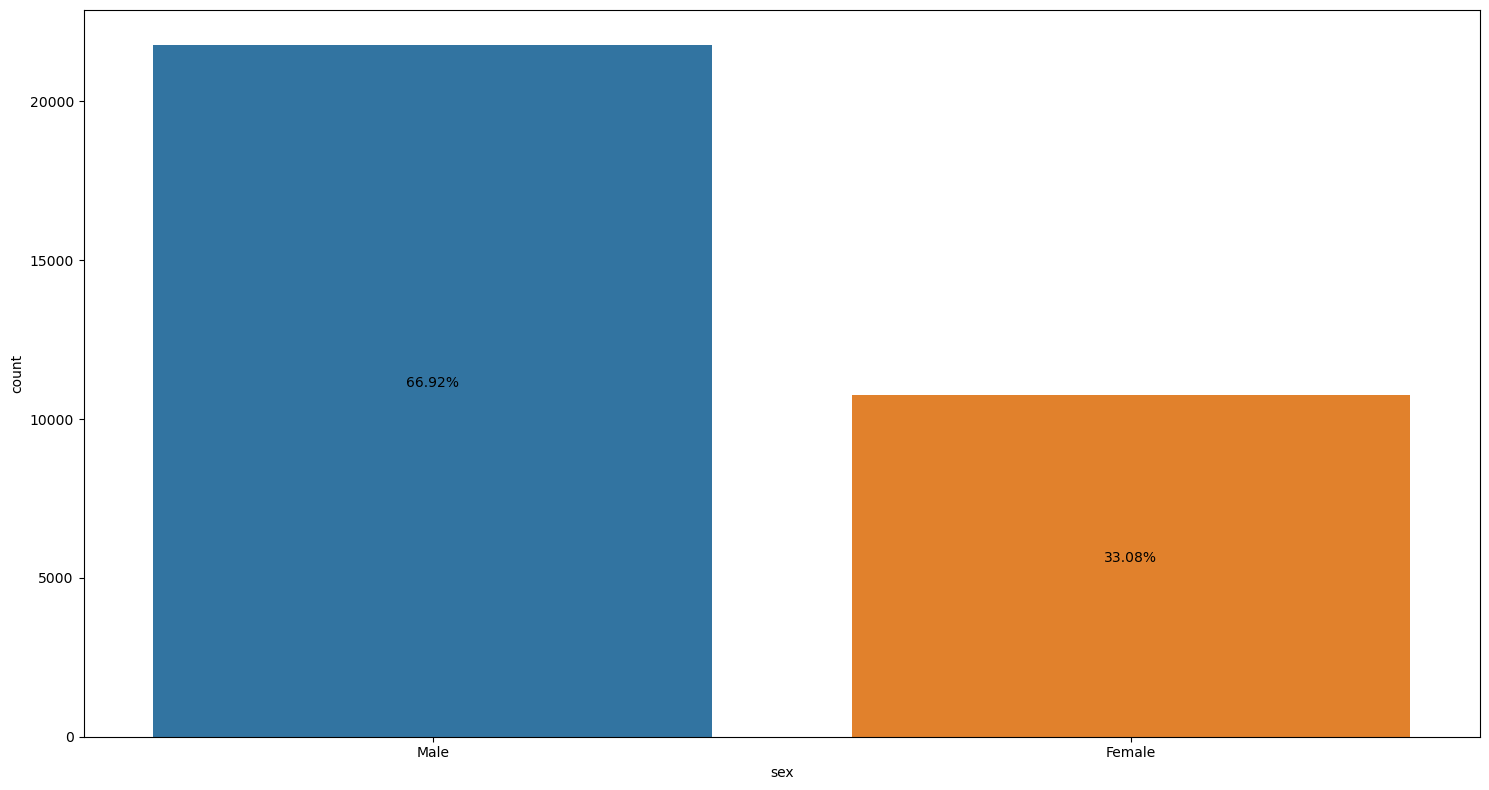

In [33]:
labeled_countplot('sex')


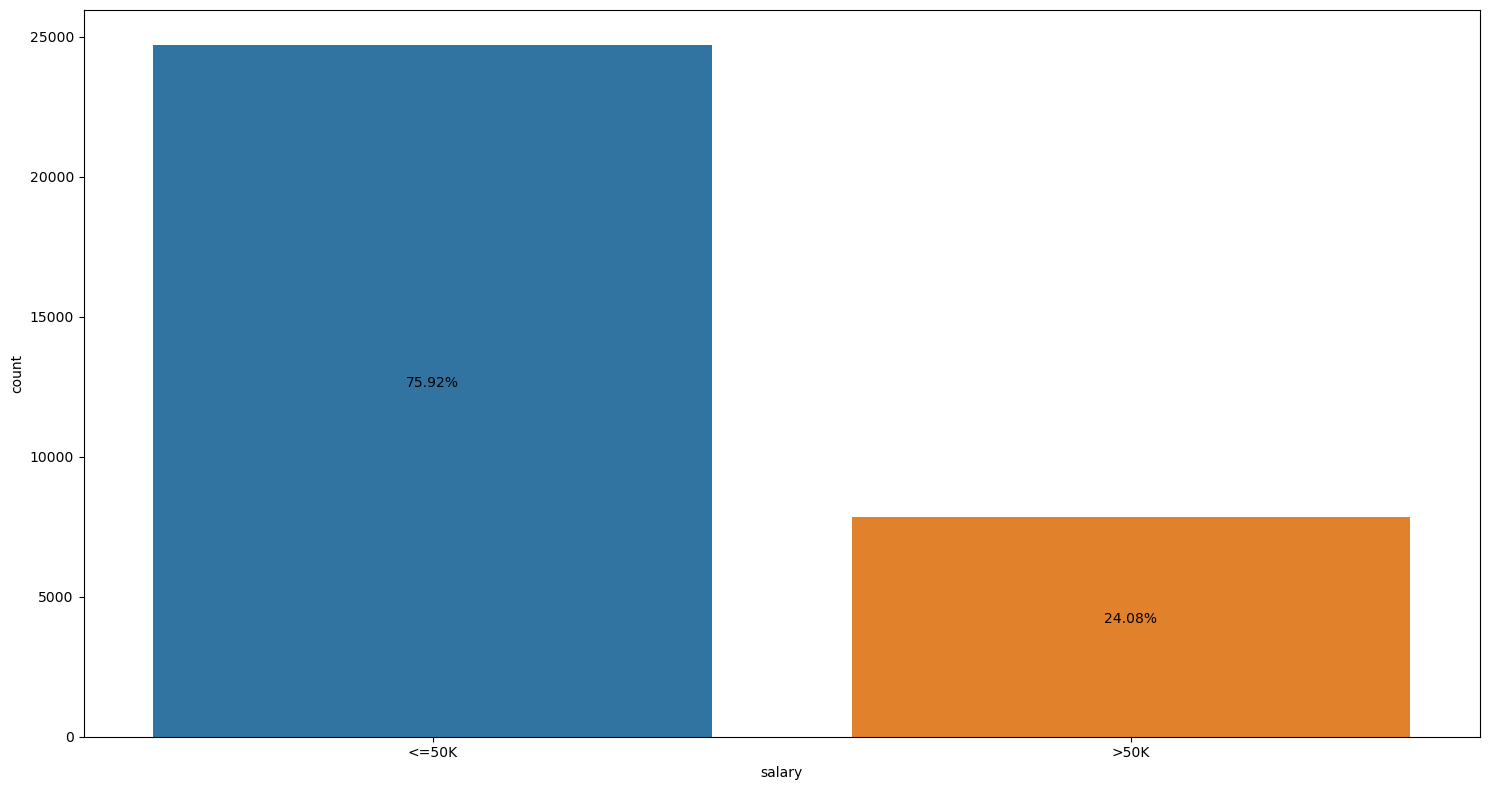

In [34]:
labeled_countplot('salary')


### BIVARIATE



In [35]:
def labeled_bar(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=sal_data[a],y=sal_data[b],color='b')
    plt.grid(color='b',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

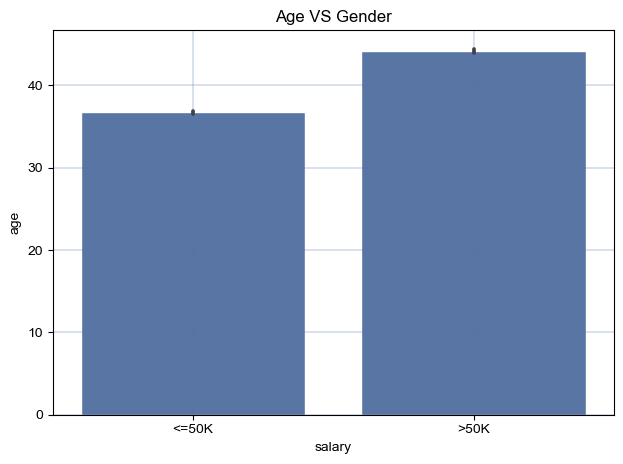

In [36]:
plt.title("Age VS Gender")
labeled_bar('salary','age')


### MULTIVARIATE

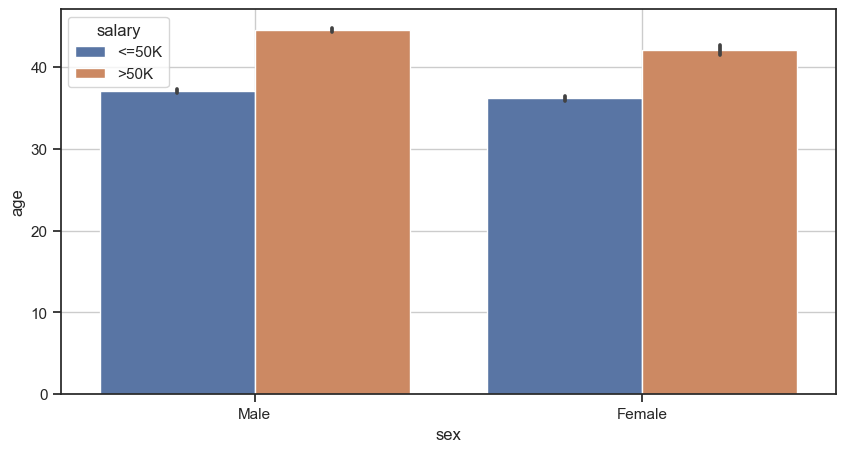

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['sex'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()


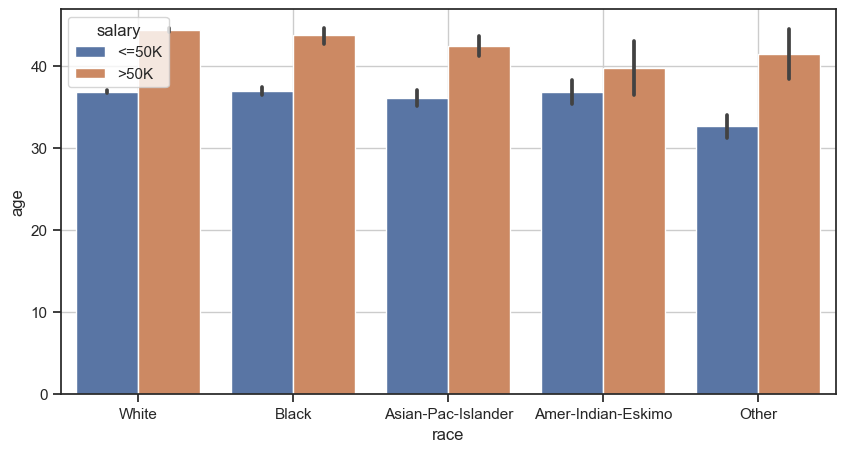

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['race'],y=sal_data['age'],hue=sal_data['salary'])
plt.grid()
plt.show()

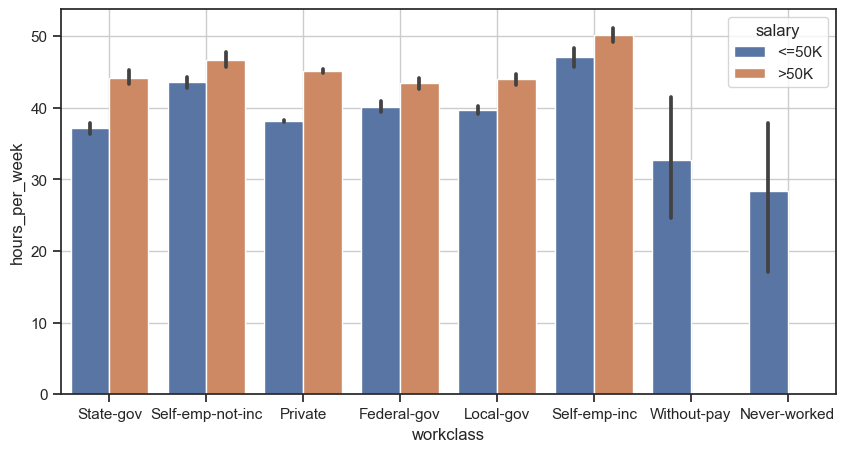

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=sal_data['workclass'],y=sal_data['hours_per_week'],hue=sal_data['salary'])
plt.grid()
plt.show()


In [40]:
sal_data

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


### Feature Engineering

In [42]:
sal_data.salary = sal_data.salary.replace('<=50K',0)
sal_data.salary = sal_data.salary.replace('>50K',1)

In [43]:
sal_data.tail()

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,0
32560,52.0,Self-emp-inc,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,1


<AxesSubplot:>

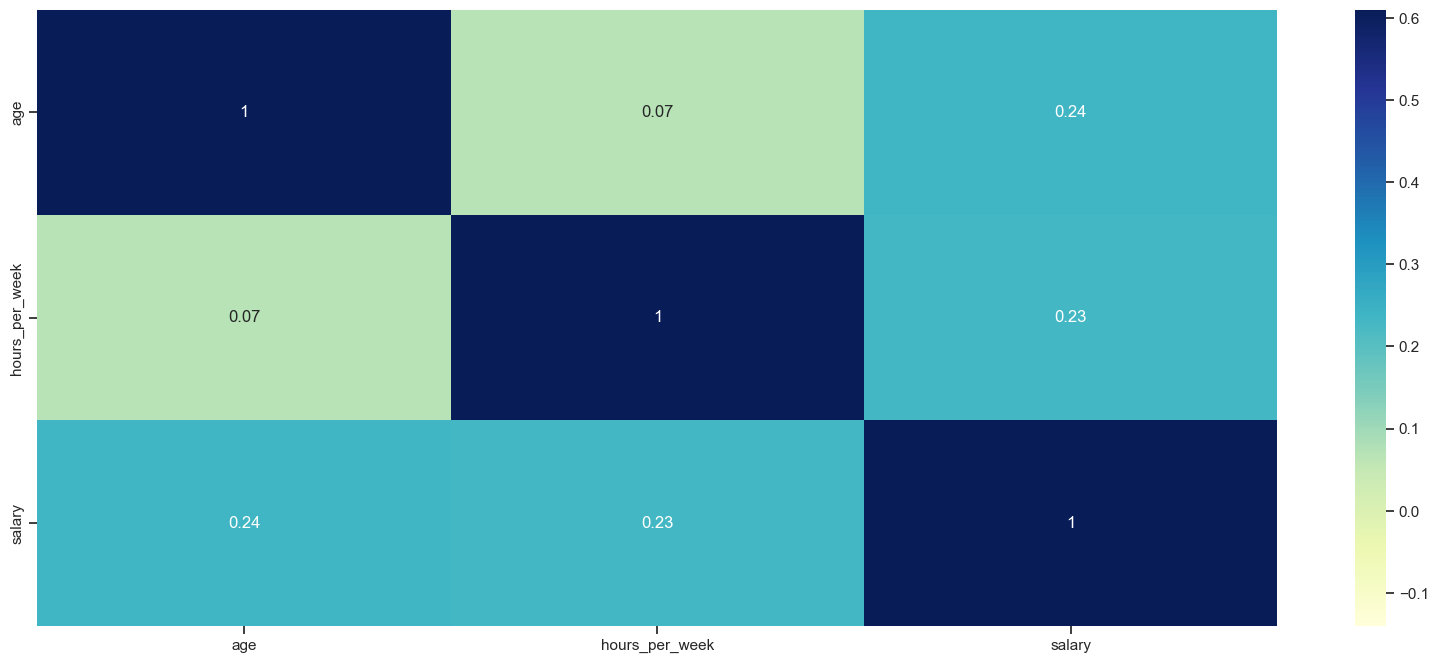

In [44]:
corrmatrix=sal_data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmin=-0.14,vmax=0.61,cmap='YlGnBu')

In [45]:
sal_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   education       32561 non-null  object 
 3   marital_status  32561 non-null  object 
 4   occupation      32561 non-null  object 
 5   relationship    32561 non-null  object 
 6   race            32561 non-null  object 
 7   sex             32561 non-null  object 
 8   hours_per_week  32561 non-null  int64  
 9   salary          32561 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.5+ MB


## PREPROCESSING

In [46]:
#Displayed the numerical columns
num_cols

,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [47]:
#Statistical Summary of numerical columns
num_cols.describe()


,age,hours_per_week
count,32561.000000,32561.000000
mean,38.581647,40.437456
std,13.640433,12.347429
min,17.000000,1.000000
25%,28.000000,40.000000
50%,37.000000,40.000000
75%,48.000000,45.000000
max,90.000000,99.000000


## ENCODING

In [48]:
#Unique values of education column
sal_data['education'].unique()


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [64]:
educ_dict = ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-acdm','Assoc-voc','Prof-school']

In [65]:
#Importing Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

In [66]:
ord_encoder=OrdinalEncoder(categories=[educ_dict])

In [67]:
#Fitting education column into ordinal encoder
ord_encoder.fit(sal_data[['education']])

ValueError: Found unknown categories ['Doctorate', 'Bachelors', 'Masters'] in column 0 during fit

In [68]:
#Transforming education column
sal_data['education']=pd.DataFrame(ord_encoder.transform(sal_data[['education']]))

IndexError: list index out of range

In [69]:
#Assigning the value to sal_data1
sal_data1=sal_data['education']

In [70]:
sal_data1


0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [71]:
#Assigning categorical variables to cat_cols
cat_cols =  sal_data.select_dtypes(["object"])


In [72]:
#Displaying cat_cols
cat_cols


,workclass,education,marital_status,occupation,relationship,race,sex
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male


In [73]:
#Importing Label encoder
from sklearn.preprocessing import LabelEncoder
#Label encoding other categorical columns
label_encoder= LabelEncoder()
for i in cat_cols:
    cat_cols[i]=label_encoder.fit_transform(cat_cols[i]) 

In [74]:
#Successfully encoded categorical columns
cat_cols

,workclass,education,marital_status,occupation,relationship,race,sex
0,6,9,4,0,1,4,1
1,5,9,2,3,0,4,1
2,3,11,0,5,1,4,1
3,3,1,2,5,0,2,1
4,3,9,2,9,5,2,0
...,...,...,...,...,...,...,...
32556,3,7,2,12,5,4,0
32557,3,11,2,6,0,4,1
32558,3,11,6,0,4,4,0
32559,3,11,4,0,3,4,1


In [75]:
label_encoder.fit(sal_data['workclass'])
print(label_encoder.classes_)

['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay']


In [76]:
label_encoder.fit(sal_data['marital_status'])
print(label_encoder.classes_)

['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']


In [77]:
label_encoder.fit(sal_data['occupation'])
print(label_encoder.classes_)


['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']


In [78]:
label_encoder.fit(sal_data['relationship'])
print(label_encoder.classes_)


['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']


In [79]:
label_encoder.fit(sal_data['race'])
print(label_encoder.classes_)


['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']


In [80]:
label_encoder.fit(sal_data['sex'])
print(label_encoder.classes_)

['Female' 'Male']


In [81]:
cat_cols['sex']


0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex, Length: 32561, dtype: int32

In [82]:
num_cols


,age,hours_per_week
0,39,40
1,50,13
2,38,40
3,53,40
4,28,40
...,...,...
32556,27,38
32557,40,40
32558,58,40
32559,22,20


In [83]:
sal_data


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [84]:
#importing the preprocessing library and did normalization in num_cols
from sklearn import preprocessing
num_cols=preprocessing.normalize(num_cols)

In [85]:
#converting array to dataframe
num_cols=pd.DataFrame(num_cols,columns=['age','hours_per_week'])


In [86]:
#Dropped the encoded and normalized columns from the original dataset
sal_data=sal_data.drop(['workclass','education','marital_status','occupation','relationship','race','sex','age','hours_per_week

SyntaxError: EOL while scanning string literal (2280564155.py, line 2)

In [87]:
sal_data


,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,salary
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,0
1,50.0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,0
2,38.0,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,0
3,53.0,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,0
4,28.0,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,0
...,...,...,...,...,...,...,...,...,...,...
32556,27.0,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,0
32557,40.0,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,1
32558,58.0,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,0
32559,22.0,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,0


In [88]:
num_cols

,age,hours_per_week
0,0.698100,0.716000
1,0.967823,0.251634
2,0.688749,0.724999
3,0.798189,0.602407
4,0.573462,0.819232
...,...,...
32556,0.579207,0.815180
32557,0.707107,0.707107
32558,0.823213,0.567733
32559,0.739940,0.672673
